In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
from tqdm import tqdm
import numpy as np

#DIABETES


In [ ]:
# Function to get BeautifulSoup object
def get_soup(url, page_num=None):
    '''Retrieves HTML content from a given URL and parses it using BeautifulSoup'''
    if page_num:
        url = f'{url}?page={page_num}'
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, 'lxml')
        return soup
    else:
        print(f'Failed to retrieve content from {url}')
        return None

# Function to parse individual review details
def parse_review_details(review):
    '''Extracts all relevant data from a single review'''
    data = {}

    # Extract date
    date_element = review.find('div', class_='date')
    data['date'] = re.findall(r'\d+/\d+/\d+', date_element.text)[0] if date_element else 'Unknown'

    # Extract condition (sometimes missing, hence conditional handling)
    condition_element = review.find('strong', class_='condition')
    data['condition'] = condition_element.text.strip() if condition_element else 'Unknown'

    # Extract rating
    rating_element = review.find('div', class_='overall-rating').strong
    data['rating_overall'] = rating_element.text if rating_element else 'Unknown'

    # Extract review text
    text_element = review.find('p', class_='description-text')
    data['text'] = text_element.text.strip() if text_element else 'No review'

    return data

# Function to scrape multiple reviews from a page
def parse_reviews_page(soup, reviews_df, drug_name, max_reviews=100):
    '''Populates reviews_df with records from a page's reviews, limited to max_reviews'''
    reviews_html = soup.find_all('div', class_='review-details')

    for review in reviews_html:
        if len(reviews_df[reviews_df['drug_name'] == drug_name]) >= max_reviews:
            break
        data = parse_review_details(review)
        data['drug_name'] = drug_name
        reviews_df = pd.concat([reviews_df, pd.DataFrame([data])], ignore_index=True)

    return reviews_df

# Set headers to mimic a browser request
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 11.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/128.0.6613.115 Safari/537.36'
}

# Empty DataFrame to store reviews
cols = ['drug_name', 'date', 'condition', 'rating_overall', 'text']
reviews_df = pd.DataFrame(columns=cols)

# List of diabetes drugs and their WebMD review URLs
drug_urls = {
    'Metformin': 'https://reviews.webmd.com/drugs/drugreview-11285-metformin-oral',
    'Empagliflozin': 'https://reviews.webmd.com/drugs/drugreview-166762-jardiance-oral',
    'Dulaglutide': 'https://reviews.webmd.com/drugs/drugreview-167025-trulicity-subcutaneous',
    'Semaglutide': 'https://reviews.webmd.com/drugs/drugreview-174491-ozempic-subcutaneous'
}

# Max number of reviews per drug
max_reviews_per_drug = 100

# Max number of pages to scrape per drug
max_pages_per_drug = 50

# Scraping process
for drug, url in drug_urls.items():
    print(f"Scraping reviews for {drug}...")

    page_num = 1
    while len(reviews_df[reviews_df['drug_name'] == drug]) < max_reviews_per_drug and page_num <= max_pages_per_drug:
        soup = get_soup(url, page_num)

        if not soup:
            break

        reviews_df = parse_reviews_page(soup, reviews_df, drug, max_reviews=max_reviews_per_drug)

        page_num += 1
        print(f"Page {page_num} scraped.")

    print(f"Finished scraping {drug}.")

# Save to CSV
reviews_df.to_csv('diabetes_drug_reviews.csv', index=False)

# Show DataFrame
print(reviews_df.head())

Scraping reviews for Metformin...
Page 2 scraped.
Page 3 scraped.
Page 4 scraped.
Page 5 scraped.
Page 6 scraped.
Finished scraping Metformin.
Scraping reviews for Empagliflozin...
Page 2 scraped.
Page 3 scraped.
Page 4 scraped.
Page 5 scraped.
Page 6 scraped.
Finished scraping Empagliflozin.
Scraping reviews for Dulaglutide...
Page 2 scraped.
Page 3 scraped.
Page 4 scraped.
Page 5 scraped.
Page 6 scraped.
Finished scraping Dulaglutide.
Scraping reviews for Semaglutide...
Page 2 scraped.
Page 3 scraped.
Page 4 scraped.
Page 5 scraped.
Page 6 scraped.
Finished scraping Semaglutide.
   drug_name       date                                          condition  \
0  Metformin  7/26/2024                Condition: Type 2 Diabetes Mellitus   
1  Metformin  7/15/2024                Condition: Type 2 Diabetes Mellitus   
2  Metformin  7/13/2024  Condition: Prevention of Type 2 Diabetes Mellitus   
3  Metformin   7/2/2024  Condition: Prevention of Type 2 Diabetes Mellitus   
4  Metformin  6/20/202

In [ ]:
reviews_df.head(20)

,drug_name,date,condition,rating_overall,text
0,Metformin,7/26/2024,Condition: Type 2 Diabetes Mellitus,Overall rating 5.0,Fine experience. Take 1000 performing ER twice...
1,Metformin,7/15/2024,Condition: Type 2 Diabetes Mellitus,Overall rating 5.0,"I've been on it three weeks, I've had very lit..."
2,Metformin,7/13/2024,Condition: Prevention of Type 2 Diabetes Mellitus,Overall rating 3.3,I have been on Metformin for almost a year now...
3,Metformin,7/2/2024,Condition: Prevention of Type 2 Diabetes Mellitus,Overall rating 1.0,"Misery! After just a week of taking this drug,..."
4,Metformin,6/20/2024,Condition: Prevention of Type 2 Diabetes Mellitus,Overall rating 1.0,"Horrible headaches, diarrhea, bloating, gas, m..."
5,Metformin,6/16/2024,Condition: Type 2 Diabetes Mellitus,Overall rating 5.0,No IBS. All other generic forms caused extreme...
6,Metformin,4/27/2024,Condition: Prevention of Type 2 Diabetes Mellitus,Overall rating 3.0,After being very sick for 3 months and a 13.2 ...
7,Metformin,4/12/2024,Condition: Prevention of Type 2 Diabetes Mellitus,Overall rating 1.7,I took this for a couple weeks after being dia...
8,Metformin,4/2/2024,Condition: Type 2 Diabetes Mellitus,Overall rating 1.7,I was told after 1 test I was type2 diabetic! ...
9,Metformin,3/21/2024,Condition: Other,Overall rating 1.0,"Severe nausea, depression and gitters. I thre..."


In [ ]:
reviews_df.tail(20)

,drug_name,date,condition,rating_overall,text
380,Semaglutide,10/5/2023,Condition: Weight Loss Management for an Obese...,Overall rating 2.7,I was worried originally about possible stomac...
381,Semaglutide,9/29/2023,Condition: Type 2 Diabetes Mellitus,Overall rating 3.0,"When I first started taking it, weight just fe..."
382,Semaglutide,9/27/2023,Condition: Weight Loss Management for an Obese...,Overall rating 5.0,I'm 6 days in and lost 10 pounds. Here the thi...
383,Semaglutide,9/22/2023,Condition: Type 2 Diabetes Mellitus,Overall rating 3.0,The directions for use of the pen are way too ...
384,Semaglutide,9/20/2023,Condition: Weight Loss Management for an Obese...,Overall rating 3.3,The subcut needle is very short. There are lon...
385,Semaglutide,9/19/2023,Condition: Type 2 Diabetes Mellitus,Overall rating 4.7,"Taking for 2 mo. now. Lost 10 lbs, but have n..."
386,Semaglutide,9/19/2023,Condition: Type 2 Diabetes Mellitus,Overall rating 3.3,I take for diabetes\nSo expensive \nAnd I feel...
387,Semaglutide,9/19/2023,Condition: Type 2 Diabetes Mellitus,Overall rating 4.3,I have used drugs like Ozempic (I use Trulicit...
388,Semaglutide,9/13/2023,Condition: Weight Loss Management for Overweig...,Overall rating 3.7,I am only on week 2 - .25 per week for two mor...
389,Semaglutide,9/12/2023,Condition: Weight Loss Management for an Obese...,Overall rating 5.0,I have tried everything to lose weight nothing...


In [ ]:
from google.colab import files
files.download('diabetes_drug_reviews.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#MIGRAINE

In [ ]:
# Function to get BeautifulSoup object
def get_soup(url, page_num=None):
    '''Retrieves HTML content from a given URL and parses it using BeautifulSoup'''
    if page_num:
        url = f'{url}?page={page_num}'
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, 'lxml')
        return soup
    else:
        print(f'Failed to retrieve content from {url}')
        return None

# Function to parse individual review details
def parse_review_details(review):
    '''Extracts all relevant data from a single review'''
    data = {}

    # Extract date
    date_element = review.find('div', class_='date')
    data['date'] = re.findall(r'\d+/\d+/\d+', date_element.text)[0] if date_element else 'Unknown'

    # Extract condition (sometimes missing, hence conditional handling)
    condition_element = review.find('strong', class_='condition')
    data['condition'] = condition_element.text.strip() if condition_element else 'Unknown'

    # Extract rating
    rating_element = review.find('div', class_='overall-rating').strong
    data['rating_overall'] = rating_element.text if rating_element else 'Unknown'

    # Extract review text
    text_element = review.find('p', class_='description-text')
    data['text'] = text_element.text.strip() if text_element else 'No review'

    return data

# Function to scrape multiple reviews from a page
def parse_reviews_page(soup, reviews_df, drug_name, max_reviews=100):
    '''Populates reviews_df with records from a page's reviews, limited to max_reviews'''
    reviews_html = soup.find_all('div', class_='review-details')

    for review in reviews_html:
        if len(reviews_df[reviews_df['drug_name'] == drug_name]) >= max_reviews:
            break
        data = parse_review_details(review)
        data['drug_name'] = drug_name
        reviews_df = pd.concat([reviews_df, pd.DataFrame([data])], ignore_index=True)

    return reviews_df

# Set headers to mimic a browser request
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 11.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/128.0.6613.115 Safari/537.36'
}

# Empty DataFrame to store reviews
cols = ['drug_name', 'date', 'condition', 'rating_overall', 'text']
reviews_df = pd.DataFrame(columns=cols)

# List of migraine drugs and their WebMD review URLs (replace with actual URLs if different)
drug_urls = {
    'Sumatriptan': 'https://reviews.webmd.com/drugs/drugreview-7741-sumatriptan-oral',
    'atogepant': 'https://reviews.webmd.com/drugs/drugreview-182401-qulipta-oral',
    'Topiramate': 'https://reviews.webmd.com/drugs/drugreview-14494-topamax-oral',
    'Celecoxib': 'https://reviews.webmd.com/drugs/drugreview-16849-celebrex-oral'
}

# Max number of reviews per drug
max_reviews_per_drug = 100

# Max number of pages to scrape per drug
max_pages_per_drug = 50

# Scraping process
for drug, url in drug_urls.items():
    print(f"Scraping reviews for {drug}...")

    page_num = 1
    while len(reviews_df[reviews_df['drug_name'] == drug]) < max_reviews_per_drug and page_num <= max_pages_per_drug:
        soup = get_soup(url, page_num)

        if not soup:
            break

        reviews_df = parse_reviews_page(soup, reviews_df, drug, max_reviews=max_reviews_per_drug)

        page_num += 1
        print(f"Page {page_num} scraped.")

    print(f"Finished scraping {drug}.")

# Save to CSV
reviews_df.to_csv('migraine_drug_reviews.csv', index=False)

# Show DataFrame
print(reviews_df.head())

Scraping reviews for Sumatriptan...
Page 2 scraped.
Page 3 scraped.
Page 4 scraped.
Page 5 scraped.
Page 6 scraped.
Finished scraping Sumatriptan.
Scraping reviews for atogepant...
Page 2 scraped.
Page 3 scraped.
Page 4 scraped.
Page 5 scraped.
Page 6 scraped.
Finished scraping atogepant.
Scraping reviews for Topiramate...
Page 2 scraped.
Page 3 scraped.
Page 4 scraped.
Page 5 scraped.
Page 6 scraped.
Finished scraping Topiramate.
Scraping reviews for Celecoxib...
Page 2 scraped.
Page 3 scraped.
Page 4 scraped.
Page 5 scraped.
Page 6 scraped.
Finished scraping Celecoxib.
     drug_name        date                     condition       rating_overall  \
0  Sumatriptan  12/31/2024  Condition: Migraine Headache   Overall rating 2.3   
1  Sumatriptan  10/11/2024  Condition: Migraine Headache   Overall rating 2.0   
2  Sumatriptan   9/27/2024  Condition: Migraine Headache   Overall rating 1.0   
3  Sumatriptan   5/25/2024  Condition: Migraine Headache   Overall rating 3.3   
4  Sumatriptan   

In [ ]:
reviews_df.head(20)

,drug_name,date,condition,rating_overall,text
0,Sumatriptan,12/31/2024,Condition: Migraine Headache,Overall rating 2.3,I've been taking Imetrix orally on and off for...
1,Sumatriptan,10/11/2024,Condition: Migraine Headache,Overall rating 2.0,I don't have a choice of brand on the NHS and ...
2,Sumatriptan,9/27/2024,Condition: Migraine Headache,Overall rating 1.0,"I take a lot of Sumatriptan, usually from Auro..."
3,Sumatriptan,5/25/2024,Condition: Migraine Headache,Overall rating 3.3,Tosymra kicked in so quick and relieved migrai...
4,Sumatriptan,5/7/2024,Condition: Migraine Headache,Overall rating 2.7,I was surprised how painful the injection is -...
5,Sumatriptan,4/24/2024,Condition: Migraine Headache,Overall rating 5.0,I started getting migraines when I was 9. NOTH...
6,Sumatriptan,2/21/2024,Condition: Migraine Headache,Overall rating 5.0,I have used Dr. Reddy Sumatriptan for Migraine...
7,Sumatriptan,1/20/2024,Condition: Migraine Headache,Overall rating 5.0,Effective at removing Migraine. Works fast and...
8,Sumatriptan,1/8/2024,Condition: Migraine Headache,Overall rating 4.0,Dr reddys brand worked with just 1 pill. Then ...
9,Sumatriptan,11/17/2023,Condition: Cluster Headache,Overall rating 4.7,I Use for sudden cluster headache spells. Work...


In [ ]:
reviews_df.tail(20)

,drug_name,date,condition,rating_overall,text
380,Celecoxib,12/5/2017,Condition: Joint Damage causing Pain and Loss ...,Overall rating 5.0,It has relieved pain and swelling in knees so ...
381,Celecoxib,11/28/2017,Condition: Joint Damage causing Pain and Loss ...,Overall rating 4.3,"It said it would last for 12 hours, but it onl..."
382,Celecoxib,11/23/2017,Condition: Acute Pain Following an Operation,Overall rating 5.0,Removed both the pain and the inflammation of ...
383,Celecoxib,10/1/2017,Condition: Painful Periods,Overall rating 5.0,I was originally prescribed this for back pain...
384,Celecoxib,9/12/2017,Condition: Joint Damage causing Pain and Loss ...,Overall rating 5.0,4 months of pain with tennis elbow. Lost 2 in...
385,Celecoxib,8/22/2017,Condition: Joint Damage causing Pain and Loss ...,Overall rating 4.7,it bothers my stomach to a small degree
386,Celecoxib,8/12/2017,Condition: Rheumatoid Arthritis,Overall rating 4.3,No review
387,Celecoxib,7/18/2017,Condition: Joint Damage causing Pain and Loss ...,Overall rating 2.7,I am dissappointed as I expected more pain rel...
388,Celecoxib,5/19/2017,Condition: Pain,Overall rating 3.3,Have taken ibuprofen from about 18 years and n...
389,Celecoxib,5/9/2017,Condition: Rheumatoid Arthritis,Overall rating 1.7,I've been taking celecoxib for about a month a...


In [ ]:
from google.colab import files
files.download('migraine_drug_reviews.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#DEPRESSION


In [ ]:
def get_soup(url, page_num=None):
    '''Retrieves HTML content from a given URL and parses it using BeautifulSoup'''
    if page_num:
        url = f'{url}?page={page_num}'
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, 'lxml')
        return soup
    else:
        print(f'Failed to retrieve content from {url}')
        return None

# Function to parse individual review details
def parse_review_details(review):
    '''Extracts all relevant data from a single review'''
    data = {}

    # Extract date
    date_element = review.find('div', class_='date')
    data['date'] = re.findall(r'\d+/\d+/\d+', date_element.text)[0] if date_element else 'Unknown'

    # Extract condition
    condition_element = review.find('strong', class_='condition')
    data['condition'] = condition_element.text.strip() if condition_element else 'Unknown'

    # Extract rating
    rating_element = review.find('div', class_='overall-rating').strong
    data['rating_overall'] = rating_element.text if rating_element else 'Unknown'

    # Extract review text
    text_element = review.find('p', class_='description-text')
    data['text'] = text_element.text.strip() if text_element else 'No review'

    return data

# Function to scrape multiple reviews from a page
def parse_reviews_page(soup, reviews_df, drug_name, max_reviews=100):
    '''Populates reviews_df with records from a page's reviews, limited to max_reviews'''
    reviews_html = soup.find_all('div', class_='review-details')

    for review in reviews_html:
        if len(reviews_df[reviews_df['drug_name'] == drug_name]) >= max_reviews:
            break
        data = parse_review_details(review)
        data['drug_name'] = drug_name
        reviews_df = pd.concat([reviews_df, pd.DataFrame([data])], ignore_index=True)

    return reviews_df

# Set headers to mimic a browser request
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 11.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/128.0.6613.115 Safari/537.36'
}

# Empty DataFrame to store reviews
cols = ['drug_name', 'date', 'condition', 'rating_overall', 'text']
reviews_df = pd.DataFrame(columns=cols)

# Depression drugs and their WebMD URLs
drug_urls = {
    'Sertraline,': 'https://reviews.webmd.com/drugs/drugreview-1-sertraline-oral',
    'Escitalopram': 'https://reviews.webmd.com/drugs/drugreview-63990-lexapro-oral',
    'Duloxetine': 'https://reviews.webmd.com/drugs/drugreview-91491-cymbalta-oral',
    'Venlafaxine': 'https://reviews.webmd.com/drugs/drugreview-1836-effexor-oral'
}

# Max number of reviews per drug
max_reviews_per_drug = 100

# Max number of pages to scrape per drug
max_pages_per_drug = 50

# Scraping process
for drug, url in drug_urls.items():
    print(f"Scraping reviews for {drug}...")

    page_num = 1
    while len(reviews_df[reviews_df['drug_name'] == drug]) < max_reviews_per_drug and page_num <= max_pages_per_drug:
        soup = get_soup(url, page_num)

        if not soup:
            break

        reviews_df = parse_reviews_page(soup, reviews_df, drug, max_reviews=max_reviews_per_drug)

        page_num += 1
        print(f"Page {page_num} scraped.")

    print(f"Finished scraping {drug}.")

# Save to CSV
reviews_df.to_csv('depression_drug_reviews.csv', index=False)

# Show DataFrame
print(reviews_df.head())

Scraping reviews for Sertraline,...
Page 2 scraped.
Page 3 scraped.
Page 4 scraped.
Page 5 scraped.
Page 6 scraped.
Finished scraping Sertraline,.
Scraping reviews for Escitalopram...
Page 2 scraped.
Page 3 scraped.
Page 4 scraped.
Page 5 scraped.
Page 6 scraped.
Finished scraping Escitalopram.
Scraping reviews for Duloxetine...
Page 2 scraped.
Page 3 scraped.
Page 4 scraped.
Page 5 scraped.
Page 6 scraped.
Finished scraping Duloxetine.
Scraping reviews for Venlafaxine...
Page 2 scraped.
Page 3 scraped.
Page 4 scraped.
Page 5 scraped.
Page 6 scraped.
Finished scraping Venlafaxine.
     drug_name        date                                          condition  \
0  Sertraline,  10/28/2024  Condition: Premenstrual Disorder with a State ...   
1  Sertraline,  10/26/2024  Condition: Premenstrual Disorder with a State ...   
2  Sertraline,  10/23/2024                              Condition: Depression   
3  Sertraline,  10/11/2024           Condition: Posttraumatic Stress Syndrome   
4  Sert

In [ ]:
reviews_df.head(20)

,drug_name,date,condition,rating_overall,text
0,"Sertraline,",10/28/2024,Condition: Premenstrual Disorder with a State ...,Overall rating 5.0,I was suffering with extreme mood swings (irri...
1,"Sertraline,",10/26/2024,Condition: Premenstrual Disorder with a State ...,Overall rating 1.0,25mg for PMDD. Was on it 2 days. Was rushed to...
2,"Sertraline,",10/23/2024,Condition: Depression,Overall rating 4.3,"Hello. In my experience, I consumed sertraline..."
3,"Sertraline,",10/11/2024,Condition: Posttraumatic Stress Syndrome,Overall rating 5.0,"i have BPD and CPTSD, this medication has been..."
4,"Sertraline,",10/11/2024,Condition: Anxiousness associated with Depression,Overall rating 5.0,"Said I would come back, after 3 months on setr..."
5,"Sertraline,",10/3/2024,Condition: Depression,Overall rating 4.7,Been on Zoloft for about 4 years and it was a ...
6,"Sertraline,",9/30/2024,Condition: Depression,Overall rating 2.0,"I suffer with BPD, severe depression and anxie..."
7,"Sertraline,",9/9/2024,Condition: Posttraumatic Stress Syndrome,Overall rating 2.7,Started taking after a trauma. I was feeling a...
8,"Sertraline,",8/29/2024,Condition: Depression,Overall rating 1.0,Zoloft was the 3rd SSRI anti-depressant I had ...
9,"Sertraline,",8/10/2024,Condition: Repeated Episodes of Anxiety,Overall rating 3.3,"I started setraline 25mg, then 50mg for about ..."


In [ ]:
reviews_df.tail(20)

,drug_name,date,condition,rating_overall,text
380,Venlafaxine,6/28/2014,Condition: Depression,Overall rating 3.0,I had been taking Effexor XR for about 10 year...
381,Venlafaxine,6/2/2014,Condition: Depression,Overall rating 5.0,Effexor has worked for me every time. Recently...
382,Venlafaxine,5/14/2014,Condition: Major Depressive Disorder,Overall rating 1.0,"After I take this medicine, I usually get a mi..."
383,Venlafaxine,5/13/2014,Condition: Repeated Episodes of Anxiety,Overall rating 4.3,I was prescribed Effexor XR after using Celexa...
384,Venlafaxine,5/11/2014,Condition: Depression,Overall rating 1.7,I took Zolft for 12 years and Paxil for 8 year...
385,Venlafaxine,4/23/2014,Condition: Repeated Episodes of Anxiety,Overall rating 3.3,"It is difficult to review this medication, bec..."
386,Venlafaxine,4/18/2014,"Condition: ""Change of Life"" Signs",Overall rating 2.7,I'm on 37.5mg 2x per day for hot flashes only....
387,Venlafaxine,4/16/2014,Condition: Bipolar Depression,Overall rating 5.0,I have been on 150mgs for 7 years. Recently I ...
388,Venlafaxine,4/15/2014,Condition: Major Depressive Disorder,Overall rating 4.0,I have been recently on Effexor XR but needed ...
389,Venlafaxine,3/19/2014,Condition: Other,Overall rating 3.7,This drug sucks or at least the generic versio...


In [ ]:
from google.colab import files
files.download('depression_drug_reviews.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#HYPERTENSION

In [ ]:
# Function to get BeautifulSoup object
def get_soup(url, page_num=None):
    '''Retrieves HTML content from a given URL and parses it using BeautifulSoup'''
    if page_num:
        url = f'{url}?page={page_num}'
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, 'lxml')
        return soup
    else:
        print(f'Failed to retrieve content from {url}')
        return None

# Function to parse individual review details
def parse_review_details(review):
    '''Extracts all relevant data from a single review'''
    data = {}

    # Extract date
    date_element = review.find('div', class_='date')
    data['date'] = re.findall(r'\d+/\d+/\d+', date_element.text)[0] if date_element else 'Unknown'

    # Extract condition
    condition_element = review.find('strong', class_='condition')
    data['condition'] = condition_element.text.strip() if condition_element else 'Unknown'

    # Extract rating
    rating_element = review.find('div', class_='overall-rating').strong
    data['rating_overall'] = rating_element.text if rating_element else 'Unknown'

    # Extract review text
    text_element = review.find('p', class_='description-text')
    data['text'] = text_element.text.strip() if text_element else 'No review'

    return data

# Function to scrape multiple reviews from a page
def parse_reviews_page(soup, reviews_df, drug_name, max_reviews=100):
    '''Populates reviews_df with records from a page's reviews, limited to max_reviews'''
    reviews_html = soup.find_all('div', class_='review-details')

    for review in reviews_html:
        if len(reviews_df[reviews_df['drug_name'] == drug_name]) >= max_reviews:
            break
        data = parse_review_details(review)
        data['drug_name'] = drug_name
        reviews_df = pd.concat([reviews_df, pd.DataFrame([data])], ignore_index=True)

    return reviews_df

# Set headers to mimic a browser request
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 11.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/128.0.6613.115 Safari/537.36'
}

# Empty DataFrame to store reviews
cols = ['drug_name', 'date', 'condition', 'rating_overall', 'text']
reviews_df = pd.DataFrame(columns=cols)

# Hypertension drugs and their WebMD URLs
drug_urls = {
    'Lisinopril': 'https://reviews.webmd.com/drugs/drugreview-6873-lisinopril-oral',
    'Amlodipine': 'https://reviews.webmd.com/drugs/drugreview-5891-amlodipine-oral',
    'Losartan': 'https://reviews.webmd.com/drugs/drugreview-6616-losartan-oral',
    'Metoprolol': 'https://reviews.webmd.com/drugs/drugreview-8814-metoprolol-succinate-oral'
}

# Max number of reviews per drug
max_reviews_per_drug = 100

# Max number of pages to scrape per drug
max_pages_per_drug = 50

# Scraping process
for drug, url in drug_urls.items():
    print(f"Scraping reviews for {drug}...")

    page_num = 1
    while len(reviews_df[reviews_df['drug_name'] == drug]) < max_reviews_per_drug and page_num <= max_pages_per_drug:
        soup = get_soup(url, page_num)

        if not soup:
            break

        reviews_df = parse_reviews_page(soup, reviews_df, drug, max_reviews=max_reviews_per_drug)

        page_num += 1
        print(f"Page {page_num} scraped.")

    print(f"Finished scraping {drug}.")

# Save to CSV
reviews_df.to_csv('hypertension_drug_reviews.csv', index=False)

# Show DataFrame
print(reviews_df.head())

Scraping reviews for Lisinopril...
Page 2 scraped.
Page 3 scraped.
Page 4 scraped.
Page 5 scraped.
Page 6 scraped.
Finished scraping Lisinopril.
Scraping reviews for Amlodipine...
Page 2 scraped.
Page 3 scraped.
Page 4 scraped.
Page 5 scraped.
Page 6 scraped.
Finished scraping Amlodipine.
Scraping reviews for Losartan...
Page 2 scraped.
Page 3 scraped.
Page 4 scraped.
Page 5 scraped.
Page 6 scraped.
Finished scraping Losartan.
Scraping reviews for Metoprolol...
Page 2 scraped.
Page 3 scraped.
Page 4 scraped.
Page 5 scraped.
Page 6 scraped.
Finished scraping Metoprolol.
    drug_name        date                       condition  \
0  Lisinopril   3/22/2025  Condition: High Blood Pressure   
1  Lisinopril  12/11/2024                Condition: Other   
2  Lisinopril  12/10/2024                Condition: Other   
3  Lisinopril  11/15/2024  Condition: High Blood Pressure   
4  Lisinopril   11/8/2024  Condition: High Blood Pressure   

        rating_overall                                   

In [ ]:
reviews_df.head(20)

,drug_name,date,condition,rating_overall,text
0,Lisinopril,3/22/2025,Condition: High Blood Pressure,Overall rating 3.3,I had to get off lisinopril. It did what its s...
1,Lisinopril,12/11/2024,Condition: Other,Overall rating 1.0,The doctor prescribed it for me for not drinki...
2,Lisinopril,12/10/2024,Condition: Other,Overall rating 1.0,My doctor prescribed it to me because I was no...
3,Lisinopril,11/15/2024,Condition: High Blood Pressure,Overall rating 3.0,Was just diagnosed with high blood pressure an...
4,Lisinopril,11/8/2024,Condition: High Blood Pressure,Overall rating 5.0,I have been using Lisinopril 5mg for a month n...
5,Lisinopril,10/30/2024,Condition: High Blood Pressure,Overall rating 1.0,If your doctor is trying to talk you into lisi...
6,Lisinopril,10/16/2024,Condition: High Blood Pressure,Overall rating 2.3,I have hashimotos and my thyroid levels were a...
7,Lisinopril,9/22/2024,Condition: High Blood Pressure,Overall rating 2.3,After figuring out what was wrong with me I st...
8,Lisinopril,9/13/2024,Condition: High Blood Pressure,Overall rating 1.0,This was the only medication my 51 year old Fa...
9,Lisinopril,9/12/2024,Condition: High Blood Pressure,Overall rating 2.3,Medicine was amazing at lowering my high blood...


In [ ]:
reviews_df.tail(20)

,drug_name,date,condition,rating_overall,text
380,Metoprolol,1/4/2022,Condition: Ventricular Rate Control in Atrial ...,Overall rating 2.3,I had a ventricular ablation 2 years ago and t...
381,Metoprolol,12/9/2021,Condition: High Blood Pressure,Overall rating 5.0,I have irregular heartbeat been on metoprolol ...
382,Metoprolol,12/1/2021,Condition: High Blood Pressure,Overall rating 2.0,Since taking this medication for my blood pres...
383,Metoprolol,11/11/2021,Condition: High Blood Pressure,Overall rating 1.0,Never been on a long term med before. I felt o...
384,Metoprolol,10/15/2021,Condition: High Blood Pressure,Overall rating 1.0,"All I can say is, RUN!!! I've been on Metoprol..."
385,Metoprolol,10/12/2021,Condition: Abnormal Heart Rhythm,Overall rating 2.3,A one-time ER visit a year ago with diagnosed ...
386,Metoprolol,10/5/2021,Condition: High Blood Pressure,Overall rating 2.3,After switching to er my BP went up and I am ...
387,Metoprolol,8/30/2021,Condition: Other,Overall rating 1.7,My husband was just prescribed this medicine a...
388,Metoprolol,7/27/2021,Condition: High Blood Pressure,Overall rating 1.0,MAFMAMA - my rating was very off
389,Metoprolol,7/27/2021,Condition: High Blood Pressure,Overall rating 3.7,I was diagnosed with rheumatoid arthritis in D...


In [ ]:
from google.colab import files
files.download('hypertension_drug_reviews.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Combining all 4 review files

In [ ]:
files = [
    'migraine_drug_reviews.csv',
    'diabetes_drug_reviews.csv',
    'depression_drug_reviews.csv',
    'hypertension_drug_reviews.csv'
]

# Initialize an empty DataFrame
df = pd.DataFrame()

# Loop through each file and load its content, replacing the DataFrame each time
for file in files:
    try:
        temp_df = pd.read_csv(file)
        df = pd.concat([df, temp_df], ignore_index=True)
        print(f"Successfully loaded {file}")
    except FileNotFoundError:
        print(f"{file} not found. Please ensure the file exists.")
    except Exception as e:
        print(f"Error loading {file}: {e}")

# Save the combined DataFrame to a new CSV file
df.to_csv('drug_reviews.csv', index=False)

# Display the first few rows of the new DataFrame
print("Combined Dataset Preview:")
print(df.head())

Successfully loaded migraine_drug_reviews.csv
Successfully loaded diabetes_drug_reviews.csv
depression_drug_reviews.csv not found. Please ensure the file exists.
Successfully loaded hypertension_drug_reviews.csv
Combined Dataset Preview:
     drug_name        date                     condition       rating_overall  \
0  Sumatriptan  12/31/2024  Condition: Migraine Headache   Overall rating 2.3   
1  Sumatriptan  10/11/2024  Condition: Migraine Headache   Overall rating 2.0   
2  Sumatriptan   9/27/2024  Condition: Migraine Headache   Overall rating 1.0   
3  Sumatriptan   5/25/2024  Condition: Migraine Headache   Overall rating 3.3   
4  Sumatriptan    5/7/2024  Condition: Migraine Headache   Overall rating 2.7   

                                                text  
0  I've been taking Imetrix orally on and off for...  
1  I don't have a choice of brand on the NHS and ...  
2  I take a lot of Sumatriptan, usually from Auro...  
3  Tosymra kicked in so quick and relieved migrai...  


In [ ]:
df.head()

,drug_name,date,condition,rating_overall,text
0,Sumatriptan,12/31/2024,Condition: Migraine Headache,Overall rating 2.3,I've been taking Imetrix orally on and off for...
1,Sumatriptan,10/11/2024,Condition: Migraine Headache,Overall rating 2.0,I don't have a choice of brand on the NHS and ...
2,Sumatriptan,9/27/2024,Condition: Migraine Headache,Overall rating 1.0,"I take a lot of Sumatriptan, usually from Auro..."
3,Sumatriptan,5/25/2024,Condition: Migraine Headache,Overall rating 3.3,Tosymra kicked in so quick and relieved migrai...
4,Sumatriptan,5/7/2024,Condition: Migraine Headache,Overall rating 2.7,I was surprised how painful the injection is -...


In [ ]:
print("Initial Dataset Information:")
df.shape
df.info()

Initial Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   drug_name       1200 non-null   object
 1   date            1200 non-null   object
 2   condition       1200 non-null   object
 3   rating_overall  1200 non-null   object
 4   text            1200 non-null   object
dtypes: object(5)
memory usage: 47.0+ KB


In [ ]:
print("\nMissing Values:")
df.isnull().sum()


Missing Values:


,0
drug_name,0
date,0
condition,0
rating_overall,0
text,0


In [ ]:
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\n', ' ', text)  # Remove newlines
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\s+', ' ', text)  # Replace multiple spaces with a single space
    return text.strip()

In [ ]:
df['cleaned_text'] = df['text'].apply(clean_text)

In [ ]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')

In [ ]:
df['condition'] = df['condition'].str.lower().str.strip()

In [ ]:
df = df.drop_duplicates(subset=['drug_name', 'text'], keep='first')

In [ ]:
df.head()

,drug_name,date,condition,rating_overall,text,cleaned_text
0,Sumatriptan,2024-12-31,condition: migraine headache,Overall rating 2.3,I've been taking Imetrix orally on and off for...,ive been taking imetrix orally on and off for ...
1,Sumatriptan,2024-10-11,condition: migraine headache,Overall rating 2.0,I don't have a choice of brand on the NHS and ...,i dont have a choice of brand on the nhs and i...
2,Sumatriptan,2024-09-27,condition: migraine headache,Overall rating 1.0,"I take a lot of Sumatriptan, usually from Auro...",i take a lot of sumatriptan usually from aurob...
3,Sumatriptan,2024-05-25,condition: migraine headache,Overall rating 3.3,Tosymra kicked in so quick and relieved migrai...,tosymra kicked in so quick and relieved migrai...
4,Sumatriptan,2024-05-07,condition: migraine headache,Overall rating 2.7,I was surprised how painful the injection is -...,i was surprised how painful the injection is s...


In [ ]:
print(df[['text', 'cleaned_text']].head(20))

                                                 text  \
0   I've been taking Imetrix orally on and off for...   
1   I don't have a choice of brand on the NHS and ...   
2   I take a lot of Sumatriptan, usually from Auro...   
3   Tosymra kicked in so quick and relieved migrai...   
4   I was surprised how painful the injection is -...   
5   I started getting migraines when I was 9. NOTH...   
6   I have used Dr. Reddy Sumatriptan for Migraine...   
7   Effective at removing Migraine. Works fast and...   
8   Dr reddys brand worked with just 1 pill. Then ...   
9   I Use for sudden cluster headache spells. Work...   
10  I started taking sumatriptan when I was probab...   
11  I took sumatriptan for a couple years to treat...   
12  This medication has been a serious game change...   
13  Dizzy, panic, blurry vision, nausea, shakiness...   
14  When this drug was made in the U.K., it was a ...   
15  I had my physician specify on the script to my...   
16  I have abdominal migraines,

#Sentiment Analysis

1. Sentiment Labeling(VADER)

In [ ]:
!pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 4.3 MB/s eta 0:00:00


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [ ]:
# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to label sentiment based on VADER scores
def label_sentiment_vader(review):
    score = analyzer.polarity_scores(review)
    if score['compound'] >= 0.05:
        return 'positive'
    elif score['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply the VADER sentiment labeling
df['sentiment'] = df['cleaned_text'].apply(label_sentiment_vader)

# Display the updated dataset with sentiment labels
print(df[['cleaned_text', 'sentiment']].head(20))


                                         cleaned_text sentiment
0   ive been taking imetrix orally on and off for ...  positive
1   i dont have a choice of brand on the nhs and i...  negative
2   i take a lot of sumatriptan usually from aurob...  negative
3   tosymra kicked in so quick and relieved migrai...  positive
4   i was surprised how painful the injection is s...  negative
5   i started getting migraines when i was 9 nothi...  positive
6   i have used dr reddy sumatriptan for migraine ...  positive
7   effective at removing migraine works fast and ...  negative
8   dr reddys brand worked with just 1 pill then m...  negative
9   i use for sudden cluster headache spells works...  negative
10  i started taking sumatriptan when i was probab...  positive
11  i took sumatriptan for a couple years to treat...  positive
12  this medication has been a serious game change...  positive
13  dizzy panic blurry vision nausea shakiness and...  negative
14  when this drug was made in the uk it

Implementing the baseline model

In [ ]:
from sklearn.model_selection import train_test_split  # For splitting the dataset
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer  # For text vectorization
from sklearn.pipeline import Pipeline  # For creating a machine learning pipeline
from sklearn.linear_model import LogisticRegression  # For the baseline model
import matplotlib.pyplot as plt  # For visualizations
import seaborn as sns

In [ ]:
X = df['cleaned_text']
y = df['sentiment']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X , y , test_size=0.2, random_state=42)

In [ ]:
print(f'Train size: {X_train.shape[0]}, Test size: {X_test.shape[0]}')

Train size: 953, Test size: 239


In [ ]:
svm_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('svc', SVC(kernel='linear'))
])

In [ ]:
svm_pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('svc', SVC(kernel='linear'))])

In [ ]:
y_pred_svm = svm_pipeline.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

    negative       0.74      0.91      0.82       158
     neutral       0.00      0.00      0.00        12
    positive       0.62      0.41      0.49        69

    accuracy                           0.72       239
   macro avg       0.45      0.44      0.44       239
weighted avg       0.67      0.72      0.68       239



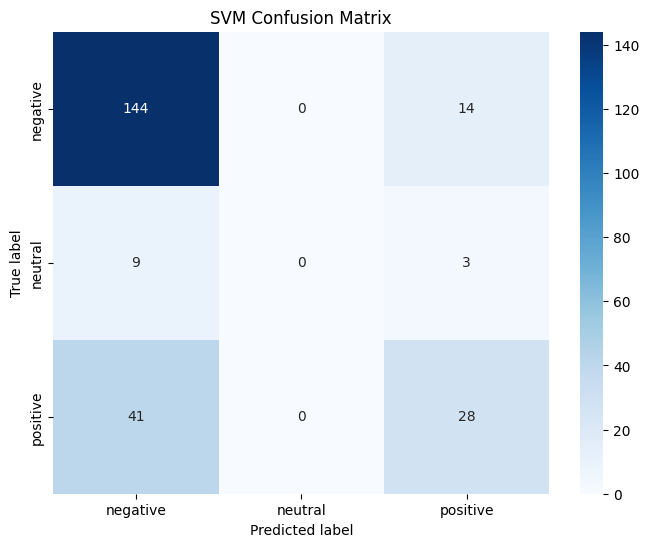

In [ ]:
# Evaluate the SVM model
print(classification_report(y_test, y_pred_svm))

# Confusion matrix for SVM
cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap=plt.cm.Blues, xticklabels=svm_pipeline.classes_, yticklabels=svm_pipeline.classes_)
plt.title('SVM Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
df.head()

,drug_name,date,condition,rating_overall,text,cleaned_text,sentiment
0,Sumatriptan,2024-12-31,condition: migraine headache,Overall rating 2.3,I've been taking Imetrix orally on and off for...,ive been taking imetrix orally on and off for ...,positive
1,Sumatriptan,2024-10-11,condition: migraine headache,Overall rating 2.0,I don't have a choice of brand on the NHS and ...,i dont have a choice of brand on the nhs and i...,negative
2,Sumatriptan,2024-09-27,condition: migraine headache,Overall rating 1.0,"I take a lot of Sumatriptan, usually from Auro...",i take a lot of sumatriptan usually from aurob...,negative
3,Sumatriptan,2024-05-25,condition: migraine headache,Overall rating 3.3,Tosymra kicked in so quick and relieved migrai...,tosymra kicked in so quick and relieved migrai...,positive
4,Sumatriptan,2024-05-07,condition: migraine headache,Overall rating 2.7,I was surprised how painful the injection is -...,i was surprised how painful the injection is s...,negative


Advanced Model Implementation(RoBERTa)

In [ ]:
!pip install transformers torch datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 64.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 26.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 47.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 62.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 39.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
from transformers import RobertaTokenizer, RobertaForSequenceClassification, Trainer, TrainingArguments
import torch
import re
from datasets import Dataset

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Check the sentiment distribution
print(df['sentiment'].value_counts())

# Encode 'negative' -> 0, 'neutral' -> 1, 'positive' -> 2
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['sentiment'])

# Verify the encoding
print(label_encoder.classes_)  # ['negative', 'neutral', 'positive']

sentiment
negative    727
positive    392
neutral      73
Name: count, dtype: int64
['negative' 'neutral' 'positive']


In [ ]:
import os
os.environ["WANDB_DISABLED"] = "true"

In [ ]:
import torch
from transformers import RobertaForSequenceClassification, RobertaTokenizer, Trainer, TrainingArguments
from sklearn.model_selection import train_test_split

# Model and Tokenizer
model = RobertaForSequenceClassification.from_pretrained("distilroberta-base", num_labels=3)
tokenizer = RobertaTokenizer.from_pretrained("distilroberta-base")

# Tokenize function
def tokenize_function(texts):
    return tokenizer(texts, padding="max_length", truncation=True, return_tensors="pt")

# Assuming df['cleaned_text'] contains your text data and df['label'] contains the labels
texts = list(df['cleaned_text'])
labels = list(df['label'])

# Tokenize the texts
tokenized_data = tokenize_function(texts)

# Create Dataset
class ReviewDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

# Create dataset using tokenized data and labels
dataset = ReviewDataset(tokenized_data, labels)

# Split into train (80%) and test (20%) datasets
train_size = int(0.8 * len(dataset))
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, len(dataset) - train_size])

# Define TrainingArguments
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,  # Reduce epochs to speed up training
    per_device_train_batch_size=16,  # Adjust batch size based on memory
    per_device_eval_batch_size=64,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
    fp16=True,  # Use mixed precision if on a GPU that supports it
)

# Initialize Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
)

# Train the model
trainer.train()


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/331M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at distilroberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


Step,Training Loss
10,1.079300
20,1.074300
30,1.041000
40,0.983300
50,0.925200
60,0.821100
70,0.748700
80,0.726800
90,0.840100
100,0.791800


TrainOutput(global_step=180, training_loss=0.8052385595109728, metrics={'train_runtime': 49.4788, 'train_samples_per_second': 57.782, 'train_steps_per_second': 3.638, 'total_flos': 378731046767616.0, 'train_loss': 0.8052385595109728, 'epoch': 3.0})

In [ ]:
from transformers import RobertaForSequenceClassification, Trainer, TrainingArguments

# Load RoBERTa model for 3 labels: negative, neutral, positive
model = RobertaForSequenceClassification.from_pretrained('roberta-base', num_labels=3)

# Set training arguments
training_args = TrainingArguments(
    output_dir='./results',            # Save model outputs here
    num_train_epochs=3,                # Train for 3 epochs
    per_device_train_batch_size=8,     # Train batch size
    per_device_eval_batch_size=16,     # Eval batch size
    eval_strategy="epoch",              # Evaluate after every epoch
    logging_dir='./logs',               # Log training progress
    save_strategy="epoch",              # Save model after every epoch
    logging_steps=10                    # Log every 10 steps
)

# Create a Trainer instance
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset
)

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


In [ ]:
# Start training
trainer.train()

Epoch,Training Loss,Validation Loss
1,0.818300,0.867968
2,0.907700,0.792383
3,0.638700,0.684736


TrainOutput(global_step=360, training_loss=0.8079883787367079, metrics={'train_runtime': 124.2222, 'train_samples_per_second': 23.015, 'train_steps_per_second': 2.898, 'total_flos': 752241261284352.0, 'train_loss': 0.8079883787367079, 'epoch': 3.0})

In [ ]:
# Evaluate the model on the test dataset
results = trainer.evaluate()
print("Evaluation Results:", results)

Evaluation Results: {'eval_loss': 0.6847359538078308, 'eval_runtime': 1.5579, 'eval_samples_per_second': 153.41, 'eval_steps_per_second': 9.628, 'epoch': 3.0}


In [ ]:
predictions = trainer.predict(test_dataset)
y_pred = np.argmax(predictions.predictions, axis=1)  # Predicted labels
y_true = predictions.label_ids  # True labels

# Print classification report
print(classification_report(y_true, y_pred, target_names=["negative", "neutral", "positive"]))

              precision    recall  f1-score   support

    negative       0.73      0.86      0.79       138
     neutral       0.00      0.00      0.00        12
    positive       0.63      0.54      0.58        89

    accuracy                           0.70       239
   macro avg       0.45      0.47      0.46       239
weighted avg       0.66      0.70      0.67       239



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


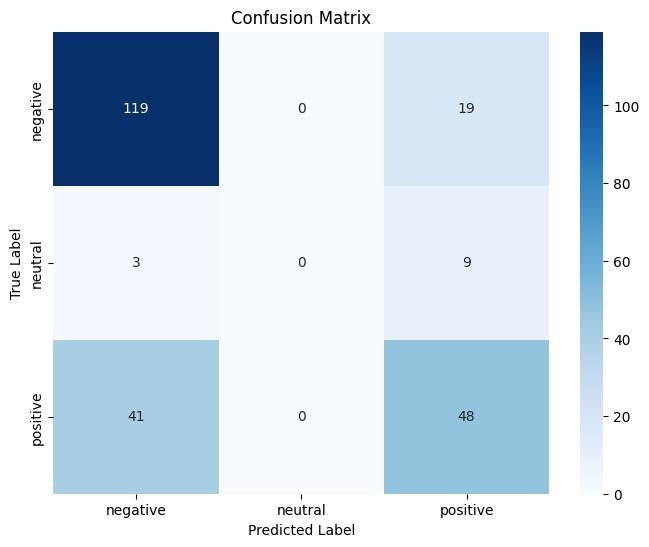

In [ ]:
def plot_confusion_matrix(y_true, y_pred, labels):
    """Plot a confusion matrix."""
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()

# Plot confusion matrix
plot_confusion_matrix(y_true, y_pred, labels=["negative", "neutral", "positive"])

In [ ]:
# Save the fine-tuned model and tokenizer
model.save_pretrained('./fine_tuned_roberta')
tokenizer.save_pretrained('./fine_tuned_roberta')

('./fine_tuned_roberta/tokenizer_config.json',
 './fine_tuned_roberta/special_tokens_map.json',
 './fine_tuned_roberta/vocab.json',
 './fine_tuned_roberta/merges.txt',
 './fine_tuned_roberta/added_tokens.json')